In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline
from pandas import read_excel
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.datasets import load_boston
import seaborn as scs

In [ ]:
df = pd.read_excel("/content/dataset.xlsx")
df.head()

,Date,Time,Humidity (%),Temperature (*C),Gas (ppm)
0,2022-05-27 23:49:34.489,23:49:34,69.0,28.6,223.82
1,2022-05-27 23:49:39.269,23:49:39,69.0,28.5,2759.01
2,2022-05-27 23:49:50.270,23:49:50,69.0,28.5,1639.69
3,2022-05-27 23:49:57.329,23:49:57,69.0,28.5,1259.32
4,2022-05-27 23:50:11.326,23:50:11,69.0,28.6,923.81


In [ ]:
df.dropna()
df.rename(columns = {'Gas (ppm)':'gasdata'}, inplace = True)
df['id'] = range(1, len(df) + 1)
del df["Time"]
del df["Date"]
df.describe()
df.head()

,Humidity (%),Temperature (*C),gasdata,id
0,69.0,28.6,223.82,1
1,69.0,28.5,2759.01,2
2,69.0,28.5,1639.69,3
3,69.0,28.5,1259.32,4
4,69.0,28.6,923.81,5


Text(0, 0.5, 'gasdata')

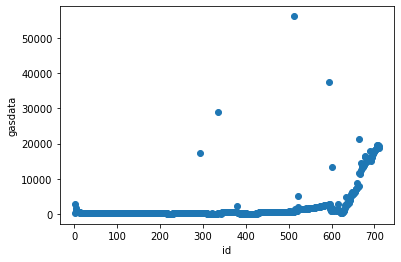

In [ ]:
plt.scatter(df.id,df['gasdata'])
plt.xlabel('id')
plt.ylabel('gasdata')

,Humidity (%),Temperature (*C),gasdata,id
0,0.023863,-1.680027,-0.372064,-1.729616
1,0.023863,-1.811786,0.146322,-1.724744
2,0.023863,-1.811786,-0.082552,-1.719872
3,0.023863,-1.811786,-0.160329,-1.715000
4,0.023863,-1.680027,-0.228933,-1.710128
...,...,...,...,...
661,0.023863,1.613961,1.237424,1.490881
662,0.023863,1.745721,1.218434,1.495753
664,0.023863,1.613961,1.990027,1.505497
665,0.023863,1.613961,1.884368,1.510369


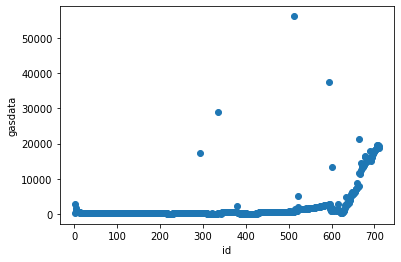

In [ ]:
plt.scatter(df.id,df['gasdata'])
plt.xlabel('id')
plt.ylabel('gasdata')
zscore_df = pd.DataFrame(stats.zscore(df.fillna(df.mean())), index=df.index, columns=df.columns).where(df.notna())
zscore_df
df3 = zscore_df[~(zscore_df['gasdata'] >= 2)]  
df3


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


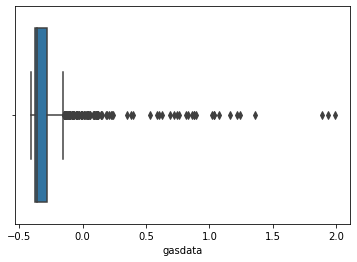

In [8]:
scs.boxplot(df3['gasdata'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Humidity (%),Temperature (*C),gasdata,id,ids
count,660.000000,660.000000,660.000000,661.000000,661.000000
mean,0.002860,-0.116880,-0.243841,-0.114529,331.000000
std,1.033506,0.918463,0.295271,0.937655,190.958547
min,-3.980725,-2.075305,-0.411123,-1.729616,1.000000
25%,-0.284183,-0.757710,-0.373074,-0.925710,166.000000
50%,0.023863,-0.230672,-0.358577,-0.116932,331.000000
75%,0.331908,0.164607,-0.284456,0.691847,496.000000
max,2.180179,3.195076,1.990027,1.515241,661.000000


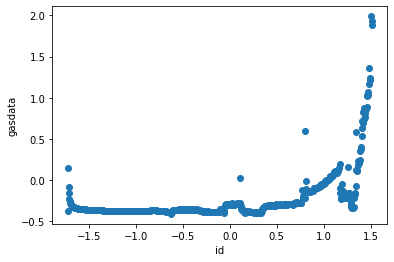

In [9]:
df3['ids'] = range(1, len(df3) + 1)
plt.scatter(df3.id,df3['gasdata'])
plt.xlabel('id')
plt.ylabel('gasdata')
df3.describe()

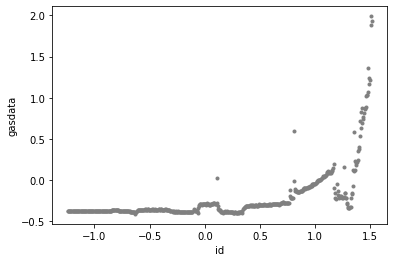

In [11]:
dfx = df3[:100]
dfy = df3[220:440]
dfz = df3[440:]
dfw=df3[100:]
import matplotlib.pyplot as plt
%matplotlib inline
plt.xlabel('id')
plt.ylabel('gasdata')
plt.scatter(dfw['id'], dfw['gasdata'],color="gray",marker='.')

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


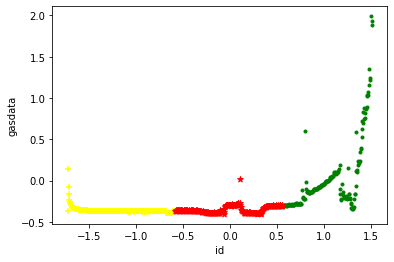

In [12]:
df3.drop([225,226], axis=0, inplace=True)
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df3[['id','gasdata']])

df3['y_predicted']=y_predicted
df3

df4= df3[df3['y_predicted']==0]
df5= df3[df3['y_predicted']==1]
df6= df3[df3['y_predicted']==2]
plt.xlabel('id')
plt.ylabel('gasdata')
plt.scatter(df4['id'], df4['gasdata'],color="yellow",marker='+')
plt.scatter(df5['id'], df5['gasdata'],color="green",marker='.')
plt.scatter(df6['id'], df6['gasdata'],color="red",marker='*')

In [13]:
from sklearn.model_selection import train_test_split

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
knn = KNeighborsClassifier(n_neighbors=4)

# knn.fit(X_train, y_train)
Y=pd.DataFrame(df3.y_predicted)
# Y=np.array([df3.y_predicted])
# Y=pd.DataFrame(df3['ids'])
X=pd.DataFrame(df3.gasdata)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33,random_state=42)

# X_train
# y_train
# y_test
#knn.score(X_test, y_test)
model = neighbors.KNeighborsRegressor(n_neighbors = 10)
model.fit(X_train, y_train) 
l=np.array(-0.411123)
pred=model.predict(l.reshape(-1,1))
print(pred)

[[1.8]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  "X does not have valid feature names, but"
